# Text Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Extracting Training data from ABSA xml
- I was able to find labeled training data for a sentiment evaluation of restaurant reviews from meta-share, a language data resource.

http://metashare.ilsp.gr:8080/repository/browse/semeval-2015-absa-restaurant-reviews-train-data/b2ac9c0c198511e4a109842b2b6a04d751e6725f2ab847df88b19ea22cb5cc4a/

In [2]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET

xml_path = './NLP/ABSA15_RestaurantsTrain2/ABSA-15_Restaurants_Train_Final.xml'

def parse_data_2015(xml_path):
    container = []                                              
    reviews = ET.parse(xml_path).getroot()                      
    
    for review in reviews:  
        sentences = review.getchildren()[0].getchildren()       
        for sentence in sentences:                                  
            sentence_text = sentence.getchildren()[0].text          
            
            try:                                                     
                opinions = sentence.getchildren()[1].getchildren()
            
                for opinion in opinions:                                
                    polarity = opinion.attrib["polarity"]
                    target = opinion.attrib["target"]
        
                    row = {"sentence": sentence_text, "sentiment":polarity}   
                    container.append(row)                                                              
                
            except IndexError: 
                row = {"sentence": sentence_text}        
                container.append(row)                                                               
                
    return pd.DataFrame(container)

ABSA_df = parse_data_2015(xml_path)
ABSA_df.head()

/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  if sys.path[0] == '':
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


,sentence,sentiment
0,Judging from previous posts this used to be a ...,negative
1,"We, there were four of us, arrived at noon - t...",negative
2,"They never brought us complimentary noodles, i...",negative
3,The food was lousy - too sweet or too salty an...,negative
4,The food was lousy - too sweet or too salty an...,negative


# Remove Duplicates and Null values

In [3]:
ABSA_df.isnull().sum()

sentence       0
sentiment    195
dtype: int64

In [38]:
print "Original:", ABSA_df.shape
ABSA_dd = ABSA_df.drop_duplicates()
dd = ABSA_dd.reset_index(drop=True)
print "Drop Dupicates:", dd.shape
dd_dn = dd.dropna()
df = dd_dn.reset_index(drop=True)
print "Drop Nulls:", dn.shape


Original: (1849, 2)
Drop Dupicates: (1396, 2)
Drop Nulls: (1201, 2)


In [39]:
test1 = df.sentence[17]
test2 = df.sentence[24]
test1, test2

('Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, because it was so great!',
 "And I hate to say this but I doubt I'll ever go back. ")

# Text Pre-processing
To further organise this process a blogpost from kdnuggets split it into categories of substitution normalization and tokenization.
https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html 

# Preprocessing: Tokenization
Tokenization is the process of converting text into tokens. For example, a document into paragraphs, then sentences and words. In this case we are tokenising into words. Once we have done this it can be easier to do further preprocessing like filtering out unesseary tokens which may cause noise.


In [40]:
df.sentence[17]

'Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, because it was so great!'

In [41]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(df.sentence[17])
print(tokens)

['Went', 'on', 'a', '3', 'day', 'oyster', 'binge', ',', 'with', 'Fish', 'bringing', 'up', 'the', 'closing', ',', 'and', 'I', 'am', 'so', 'glad', 'this', 'was', 'the', 'place', 'it', 'O', 'trip', 'ended', ',', 'because', 'it', 'was', 'so', 'great', '!']


### Stopwords
Stop words are the most commonly occuring words which are not relevant in the context of the data and do not contribute any deeper meaning to the phrase. In this case contain no sentiment. NLTK provide a library used for this.

In [42]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print [i for i in tokens if i not in stop_words]

['Went', '3', 'day', 'oyster', 'binge', ',', 'Fish', 'bringing', 'closing', ',', 'I', 'glad', 'place', 'O', 'trip', 'ended', ',', 'great', '!']


# Preprocessing: Normalization
what is normalization generally?converting…?????Normalising the case ensures that the words are treated equally. For example, ‘Apple’ and ‘apple’ are identified as the same word…?allowing text to all be on the same level so all text can be treated uniformly?   The following normalisation changes are made:



### 1. Casing the Characters 
converting character to the same case so the same words are recognised as the same. In this case we converted to lowercase. 



In [9]:
df.sentence[24]

"And I hate to say this but I doubt I'll ever go back. "

In [10]:
lower_case = df.sentence[24].lower()
lower_case

"and i hate to say this but i doubt i'll ever go back. "

### 1. Negation handling
Apostrophes connecting words are used everywhere, especially in public reviews. To maintain uniform structure throughout the whole text it is recommended to remove them in-place of the actual word. I found a dictionary of the most common apostrophe joined words.

https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view 

Negation- which way is the correct way? Does gensim do this for you?
https://stackoverflow.com/questions/28720174/negation-handling-in-nlp 

In [11]:
# %load ./NLP/appos.py
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [12]:
words = lower_case.split()
reformed = [appos[word] if word in appos else word for word in words]
reformed = " ".join(reformed) 
reformed

'and i hate to say this but i doubt I will ever go back.'

### Punctuation
Removing stand alone punctuations, special characters and numerical tokens are removed leaving only alphabetic characters left. This step needs the use of tokenized words as they have been split appropriately for us to remove.

In [13]:
tokens

['Went',
 'on',
 'a',
 '3',
 'day',
 'oyster',
 'binge',
 ',',
 'with',
 'Fish',
 'bringing',
 'up',
 'the',
 'closing',
 ',',
 'and',
 'I',
 'am',
 'so',
 'glad',
 'this',
 'was',
 'the',
 'place',
 'it',
 'O',
 'trip',
 'ended',
 ',',
 'because',
 'it',
 'was',
 'so',
 'great',
 '!']

In [14]:
words = [word for word in tokens if word.isalpha()]
words

['Went',
 'on',
 'a',
 'day',
 'oyster',
 'binge',
 'with',
 'Fish',
 'bringing',
 'up',
 'the',
 'closing',
 'and',
 'I',
 'am',
 'so',
 'glad',
 'this',
 'was',
 'the',
 'place',
 'it',
 'O',
 'trip',
 'ended',
 'because',
 'it',
 'was',
 'so',
 'great']

### Lemmatization 
This process finds the base or dictionary form of the word known as the lemma. This is done through the use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations). This normalization allows words that are similar but with different meanings can be handled in the correct way.


In [15]:
words

['Went',
 'on',
 'a',
 'day',
 'oyster',
 'binge',
 'with',
 'Fish',
 'bringing',
 'up',
 'the',
 'closing',
 'and',
 'I',
 'am',
 'so',
 'glad',
 'this',
 'was',
 'the',
 'place',
 'it',
 'O',
 'trip',
 'ended',
 'because',
 'it',
 'was',
 'so',
 'great']

In [16]:
from gensim.utils import lemmatize
lemm = [lemmatize(word) for word in words]
lemm

[['go/VB'],
 [],
 [],
 ['day/NN'],
 ['oyster/NN'],
 ['binge/NN'],
 [],
 ['fish/NN'],
 ['bring/VB'],
 [],
 [],
 ['close/VB'],
 [],
 [],
 ['be/VB'],
 ['so/RB'],
 ['glad/JJ'],
 [],
 ['be/VB'],
 [],
 ['place/NN'],
 [],
 [],
 ['trip/NN'],
 ['end/VB'],
 [],
 [],
 ['be/VB'],
 ['so/RB'],
 ['great/JJ']]

In [17]:
df.sentence[17]

'Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, because it was so great!'

In [43]:
lemmatize(df.sentence[17])

['go/VB',
 'day/NN',
 'oyster/NN',
 'binge/NN',
 'fish/NN',
 'bring/VB',
 'closing/NN',
 'be/VB',
 'so/RB',
 'glad/JJ',
 'be/VB',
 'place/NN',
 'trip/NN',
 'end/VB',
 'be/VB',
 'so/RB',
 'great/JJ']

In [19]:
df.sentence[24]

"And I hate to say this but I doubt I'll ever go back. "

In [44]:
lemmatize(df.sentence[24])

['hate/NN', 'say/VB', 'doubt/NN', 'll/NN', 'ever/RB', 'go/VB', 'back/RB']

# Substitution
In this case our reviews are clean as we were able to extract the data from the HTML file during extraction step.


out of precaution Decoding... 
### Decoding

....... rewrtieingggg

string.encode('utf-8', "ignore")


In [29]:
df.sentence[24].decode("utf-8-sig")

u"And I hate to say this but I doubt I'll ever go back. "

# Cleaning Function 
- decoding 
- lowercasing so negation dictionary can apply
- negation dictionary
- Lemmatization from gensim : tokenising, lower_case, removal of special chacacters, stand alone punctuation, stop words and POS tagging. 

In [33]:
import pandas as pd
import numpy as np
from gensim.utils import lemmatize
from tqdm import tqdm_notebook as tqdm
import time
# %load ./NLP/appos.py

In [65]:
def cleaning_function(tips):
    all_ = []
    for tip in tqdm(tips):
        time.sleep(0.0001)
        
#       Decoding function
        decode = tip.decode("utf-8-sig")
    
#       Lowercasing before negation
        lower_case = decode.lower()
    
#       Replace apostrophes with words
        words = lower_case.split()
        split = [appos[word] if word in appos else word for word in words]
        reformed = " ".join(split) 
        
#       Lemmatization
        lemm = lemmatize(lower_case)
        all_.append(lemm)
        
    return all_      

def separate_word_tag(df_lem_test):
    words=[]
    types=[]
    df= pd.DataFrame()
    for row in df_lem_test:
        sent = []
        type_ =[]
        for word in row:
            split = word.split('/')
            sent.append(split[0])
            type_.append(split[1])

        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))


    df['lem_words']= words
    df['lem_type']= types
    return df


## Preprocessing Training Data

In [67]:
lemm_df = separate_word_tag(cleaning_function(df.sentence))
lemm_df.head()

A Jupyter Widget

,lem_words,lem_type
0,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ
1,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ
2,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN
3,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ
4,complain small tip,VB JJ NN


In [79]:
# concat cleaned text with original
df_training = pd.concat([df, lemm_df], axis=1)
df_training.head()

,sentence,sentiment,lem_words,lem_type
0,Judging from previous posts this used to be a ...,negative,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ
1,"We, there were four of us, arrived at noon - t...",negative,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ
2,"They never brought us complimentary noodles, i...",negative,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN
3,The food was lousy - too sweet or too salty an...,negative,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ
4,"After all that, they complained to me about th...",negative,complain small tip,VB JJ NN


### Convert sentiment to numerical values

In [80]:
# the classes of the sentiment
print df_training.sentiment.value_counts()

positive    834
negative    317
neutral      50
Name: sentiment, dtype: int64


In [81]:
# converting the polarity to numeric values
df_training['sentiment'] = df_training.sentiment.map(lambda x: int(2) if x =='positive' else int(0) if x =='negative' else int(1) if x == 'neutral' else np.nan)

In [82]:
print df_training['sentiment'].value_counts()
df_training.head()

2    834
0    317
1     50
Name: sentiment, dtype: int64


,sentence,sentiment,lem_words,lem_type
0,Judging from previous posts this used to be a ...,0,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ
1,"We, there were four of us, arrived at noon - t...",0,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ
2,"They never brought us complimentary noodles, i...",0,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN
3,The food was lousy - too sweet or too salty an...,0,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ
4,"After all that, they complained to me about th...",0,complain small tip,VB JJ NN


# Check points
- reset index 
- look for null values

In [87]:
# reset index just to be safe
df_training = df_training.reset_index(drop=True)
df_training.isnull().sum()

sentence     0
sentiment    0
lem_words    0
lem_type     0
dtype: int64

# EDA: Visualizations
## Distribution of Sentiment


In [90]:
# the classes of the polarity
print df_training.sentiment.value_counts()

2    834
0    317
1     50
Name: sentiment, dtype: int64


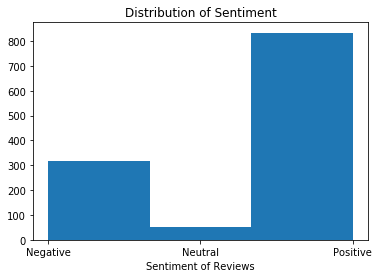

In [91]:
import matplotlib.pyplot as plt
plt.hist(df_training.sentiment, bins = 3, align= 'mid')
plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
plt.xlabel('Sentiment of Reviews')
plt.title('Distribution of Sentiment')
plt.show()

### Train Test Split + Bootstrapping

In [93]:
print df_training.sentiment.value_counts()
print df_training.shape

2    834
0    317
1     50
Name: sentiment, dtype: int64
(1201, 4)


In [100]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_training, test_size=0.3, random_state=1)

t_1 = train[train['sentiment']==1].sample(800,replace=True)
t_2 = train[train['sentiment']==2].sample(800,replace=True)
t_3 = train[train['sentiment']==0].sample(800,replace=True)
training_bs = pd.concat([t_1, t_2, t_3])

print train.shape
print training_bs.shape
print test.shape

# sanity check 
df_training.shape[0] == (train.shape[0] + test.shape[0])

(840, 4)
(2400, 4)
(361, 4)


True

# Save to csv file

In [101]:
# training and testing to csv
training_bs = training_bs.reset_index(drop=True)
training_bs.to_csv('./train_test_data/training_bs.csv', header=True, index=False, encoding='UTF8')
test = test.reset_index(drop=True)
test.to_csv('./train_test_data/testing.csv', header=True, index=False, encoding='UTF8')
training_bs.head()

,sentence,sentiment,lem_words,lem_type
0,"Rao is a good restaurant, but it's nothing spe...",1,rao be good restaurant nothing special,NN VB JJ NN NN JJ
1,Food was just average...if they lowered the pr...,1,food be just average lower price just bit be b...,NN VB RB JJ VB NN RB NN VB JJ VB
2,"As many other reviewers noticed, your order is...",1,many other reviewer notice order be often slow...,JJ JJ NN VB NN VB RB JJ VB VB RB JJ NN VB RB N...
3,With the exception of our lemon salad that had...,1,exception lemon salad have so much pepper eye ...,NN NN NN VB RB JJ NN NN VB NN RB VB JJ RB JJ
4,This place is always packed.,1,place be always pack,NN VB RB VB


# Word Cloud of Classes

In [106]:
print training_bs.sentiment.value_counts()
train_s0 = training_bs[training_bs.sentiment ==0]
train_s1 = training_bs[training_bs.sentiment ==1]
train_s2 = training_bs[training_bs.sentiment ==2]

1    800
2    800
0    800
Name: sentiment, dtype: int64


In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
from PIL import Image

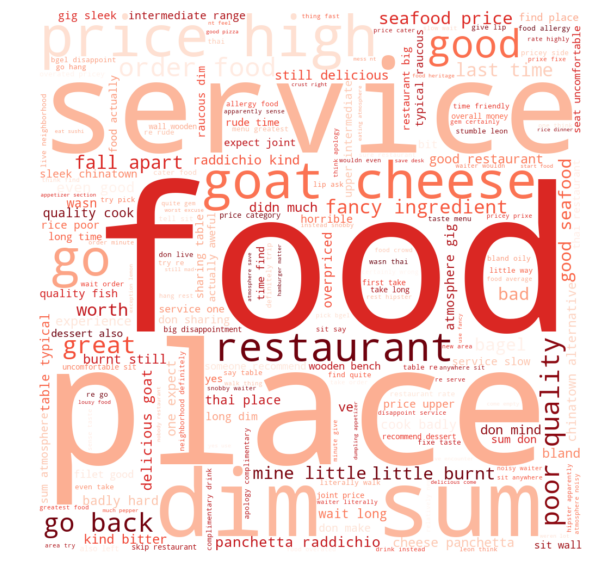

In [110]:
# Polarity == 0 negative
all_text = ' '.join(word for word in train_s0.lem_words)

# d = path.dirname('./NLP/sad.png')
# mask = np.array(Image.open(path.join(d, "sad.png")))

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

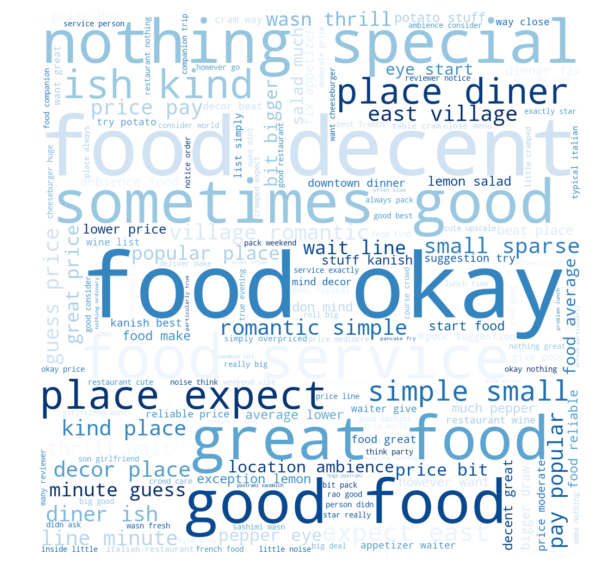

In [113]:
# Polarity == 1 neutral
all_text = ' '.join(word for word in train_s1.lem_words)

wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

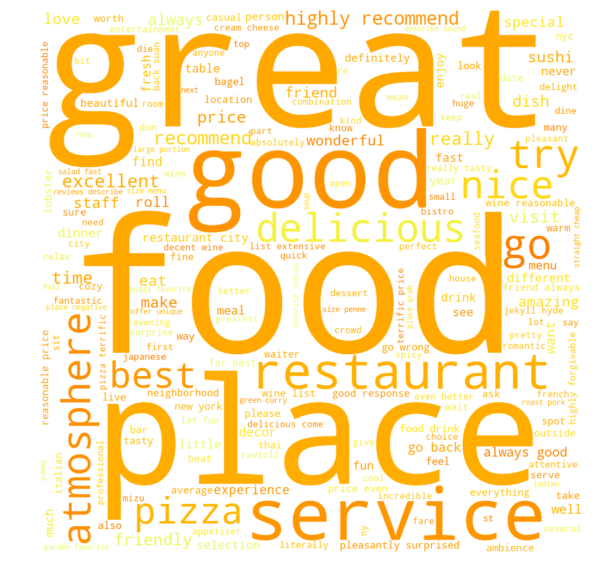

In [115]:
# Polarity == 2 positive
all_text = ' '.join(word for word in train_s2.lem_words)

p_up = path.dirname('./NLP/up_hole.png')
mask_up = np.array(Image.open(path.join(p_up, 'up_hole.png')))

wordcloud_p2 = WordCloud(width=1000, height=1000, colormap='Wistia',background_color='white', mode='RGBA').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_p2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()